# COGS 108 - Data Checkpoint

# Names

- Salma Sheriff
- Mizuki Kadowaki 
- Zoe Lederman 
- Yashaswat Malhotra


<a id='research_question'></a>
# Research Question

Does the perceived citizen happiness correlate with COVID-19 outcomes?

# Dataset(s)

Dataset Name: World Happiness Report
Link to the dataset: https://www.kaggle.com/unsdsn/world-happiness (https://www.kaggle.com/unsdsn/world-happiness)
Number of observations:
Results compiled from a happiness survey in countries, used to provide a happiness score and rank the happiness of 155 countries in 2019.

Dataset Name: COVID-19 Coronavirus Complete Dataset
Link to the dataset: https://www.kaggle.com/ashudata/covid19dataset? select=COVID_Data_Basic.csv (https://www.kaggle.com/ashudata/covid19dataset? select=COVID_Data_Basic.csv)
Number of observations:

Reports on outcomes of COVID-19 (confirmed cases, deaths, etc.) in 194 unique countries between 12/31/2019 - 11/6/2020.

We plan to combine these datasets based on county. We will only be using countries that are present in both of these datasets.


# Setup

In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [2]:
# import datasets
happy_2019 = pd.read_csv("data/2019.csv")
covid_basic = pd.read_csv("data/COVID_Data_Basic.csv")


The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.


# Data Cleaning

*For COVID Dataset*
1. Remove data from before January 2020 and after November 2020.
2. Remove cruise ships and countries that do not have any data between January and November 2020. 
3. Drop newConfirmed, newDeath, and newRecovered columns.
4. Convert the Data column values from String type to date-time type.
5. Remove countries that are not in Happiness datasets.

In [3]:
#datetime.strptime('')
covid_basic['Date'] = pd.to_datetime(covid_basic['Date'])

# Code for removing all data sets before January 2020
covid_test = covid_basic[~(covid_basic['Date'] < '2020-01-01')]

#Code for removing all data sets after November 2020
#This was done because not all countries have updated data after November.
covid_test = covid_test[~(covid_test['Date'] > '2020-10-31')]

In [4]:
#getting different properties of the original dataset, to compare with changes we make
covid_basic.head()
covid_basic.Date[0]
covid_basic.shape

(54522, 9)

In [5]:
#checking the same properties on a test dataset to see if we've made the desired changes
covid_test.head()
covid_test.Date[1]
covid_test.shape

(53316, 9)

In [6]:
#both datasets have 194 countries
len(covid_basic['Country'].unique()) == len(covid_test['Country'].unique())

True

In [7]:
#checking countries that are in covid dataset but not in happy
np.setdiff1d(covid_test['Country'] , happy_2019['Country or region'])

array(['Andorra', 'Angola', 'Antigua and Barbuda', 'Bahamas',
       'Bahamas, The', 'Barbados', 'Belize', 'Brunei', 'Burma',
       'Cabo Verde', "Cote d'Ivoire", 'Cruise Ship', 'Cuba', 'Czechia',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Equatorial Guinea',
       'Eritrea', 'Eswatini', 'Fiji', 'Gambia, The', 'Grenada',
       'Guinea-Bissau', 'Guyana', 'Holy See', 'Korea, South',
       'Liechtenstein', 'MS Zaandam', 'Maldives', 'Marshall Islands',
       'Martinique', 'Monaco', 'Oman', 'Papua New Guinea',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Solomon Islands', 'Sudan',
       'Suriname', 'Taiwan*', 'Timor-Leste', 'Trinidad and Tobago', 'US',
       'West Bank and Gaza', 'Western Sahara'], dtype=object)

In [8]:
#checking countries that are in happiness dataset but not in covid
np.setdiff1d(happy_2019['Country or region'], covid_test['Country'])

array(['Czech Republic', 'Hong Kong', 'Ivory Coast', 'Myanmar',
       'Northern Cyprus', 'Palestinian Territories', 'South Korea',
       'Swaziland', 'Taiwan', 'Trinidad & Tobago', 'Turkmenistan',
       'United States'], dtype=object)

In [9]:
#renaming countries that are the same but entered differently
covid_test = covid_test.replace(["Czechia", "Cote d'Ivoire", "Burma", 
                    "West Bank and Gaza", "Korea, South", 
                    "Eswatini","Taiwan*","Trinidad and Tobago", "US"],
                   ['Czech Republic', 'Ivory Coast', 'Myanmar',
                    'Palestinian Territories', 'South Korea',
                    'Swaziland', 'Taiwan', 'Trinidad & Tobago',
                    'United States'])

In [10]:
#checking countries that are in covid dataset but not in happy
np.setdiff1d(covid_test['Country'] , happy_2019['Country or region'])

array(['Andorra', 'Angola', 'Antigua and Barbuda', 'Bahamas',
       'Bahamas, The', 'Barbados', 'Belize', 'Brunei', 'Cabo Verde',
       'Cruise Ship', 'Cuba', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gambia, The', 'Grenada',
       'Guinea-Bissau', 'Guyana', 'Holy See', 'Liechtenstein',
       'MS Zaandam', 'Maldives', 'Marshall Islands', 'Martinique',
       'Monaco', 'Oman', 'Papua New Guinea', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Solomon Islands', 'Sudan',
       'Suriname', 'Timor-Leste', 'Western Sahara'], dtype=object)

In [11]:
#checking countries that are in happiness dataset but not in covid
np.setdiff1d(happy_2019['Country or region'], covid_test['Country'])

array(['Hong Kong', 'Northern Cyprus', 'Turkmenistan'], dtype=object)

In [12]:
#removing countries that are in covid dataset and not in happiness dataset
covid_test = covid_test[~covid_test['Country'].isin(['Andorra','Angola', 'Antigua and Barbuda', 'Bahamas',
       'Bahamas, The', 'Barbados', 'Belize', 'Brunei', 'Cabo Verde',
       'Cruise Ship', 'Cuba', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gambia, The', 'Grenada',
       'Guinea-Bissau', 'Guyana', 'Holy See', 'Liechtenstein',
       'MS Zaandam', 'Maldives', 'Marshall Islands', 'Martinique',
       'Monaco', 'Oman', 'Papua New Guinea', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Solomon Islands', 'Sudan',
       'Suriname', 'Timor-Leste', 'Western Sahara','Kosovo'])]



In [13]:
#removing countries that are in happiness dataset and not in covid dataset
happy_2019 = happy_2019[~happy_2019['Country or region'].isin(['Hong Kong', 'Northern Cyprus', 'Turkmenistan'])]

In [14]:
pop_dens = pd.read_csv("data/population_by_country_2020.csv")
pop_dens.head()

pop_dens = pop_dens.drop(['Yearly Change', 'Net Change', 'Migrants (net)', 
                          'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'], axis =1)
pop_dens.head()

pop_dens.shape
#more countries in this dataset since we haven't standardized it yet

#checking countries that are in pop_dens dataset but not in happy
np.setdiff1d(pop_dens['Country (or dependency)'] , happy_2019['Country or region'])

#checking countries that are in happiness dataset but not in pop_dens
np.setdiff1d(happy_2019['Country or region'], pop_dens['Country (or dependency)'])

#renaming countries that are the same but entered differently; standardizing to happiness dataset
pop_dens = pop_dens.replace(["Czech Republic (Czechia)", "Côte d'Ivoire", 
                    "State of Palestine", 'Congo','DR Congo',
                    "Eswatini","Trinidad and Tobago"],
                   ['Czech Republic', 'Ivory Coast',
                    'Palestinian Territories','Congo (Brazzaville)', 'Congo (Kinshasa)',
                    'Swaziland', 'Trinidad & Tobago'])

#checking countries that are in happiness dataset but not in pop_dens
np.setdiff1d(happy_2019['Country or region'], pop_dens['Country (or dependency)'])

#checking countries that are in pop_dens dataset but not in happy
np.setdiff1d(pop_dens['Country (or dependency)'] , happy_2019['Country or region'])

#removing countries that are in pop_dens dataset and not in happiness dataset
pop_dens = pop_dens[~pop_dens['Country (or dependency)'].isin(['American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize',
       'Bermuda', 'British Virgin Islands', 'Brunei', 'Cabo Verde',
       'Caribbean Netherlands', 'Cayman Islands', 'Channel Islands',
       'Cook Islands', 'Cuba', 'Curaçao', 'Djibouti', 'Dominica',
       'Equatorial Guinea', 'Eritrea', 'Faeroe Islands',
       'Falkland Islands', 'Fiji', 'French Guiana', 'French Polynesia',
       'Gibraltar', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam',
       'Guinea-Bissau', 'Guyana', 'Holy See', 'Isle of Man', 'Kiribati',
       'Liechtenstein', 'Macao', 'Maldives', 'Marshall Islands',
       'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Montserrat',
       'Nauru', 'New Caledonia', 'Niue', 'North Korea',
       'Northern Mariana Islands', 'Oman', 'Palau', 'Papua New Guinea',
       'Puerto Rico', 'Réunion', 'Saint Barthelemy', 'Saint Helena',
       'Saint Kitts & Nevis', 'Saint Lucia', 'Saint Martin',
       'Saint Pierre & Miquelon', 'Samoa', 'San Marino',
       'Sao Tome & Principe', 'Seychelles', 'Sint Maarten',
       'Solomon Islands', 'St. Vincent & Grenadines', 'Sudan', 'Suriname',
       'Timor-Leste', 'Tokelau', 'Tonga', 'Turks and Caicos', 'Tuvalu',
       'U.S. Virgin Islands', 'Vanuatu', 'Wallis & Futuna',
       'Western Sahara','Hong Kong', 'Turkmenistan'])]


#removing countries that are in happiness dataset and not in covid dataset
happy_2019 = happy_2019[~happy_2019['Country or region'].isin(['Kosovo', 'Northern Cyprus'])]

happy_2019

pop_dens

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²)
0,China,1438207241,153,9388211
1,India,1377233523,464,2973190
2,United States,330610570,36,9147420
3,Indonesia,272931713,151,1811570
4,Pakistan,219992900,287,770880
...,...,...,...,...
164,Bhutan,769867,20,38117
167,Montenegro,628050,47,13450
168,Luxembourg,623861,242,2590
173,Malta,441308,1380,320


In [15]:
#checking countries that are in happiness dataset but not in covid_test; should be empty
np.setdiff1d(happy_2019['Country or region'], covid_test['Country'])

#checking countries that are in covid_test dataset but not in happy; should be empty
np.setdiff1d(covid_test['Country'] , happy_2019['Country or region'])

array([], dtype=object)

In [16]:
#checking countries that are in pop_dens dataset but not in covid_test; should be empty
np.setdiff1d(pop_dens['Country (or dependency)'], covid_test['Country'])

#checking countries that are in covid_test dataset but not in pop_dens; should be empty
np.setdiff1d(covid_test['Country'] , pop_dens['Country (or dependency)'])

array([], dtype=object)

In [17]:
covid_test.sort_values(by = 'Country', ascending = True)

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0
10586,20310,Afghanistan,2020-08-11,37269,1344,26415,107,16,187
10587,204100,Afghanistan,2020-08-12,37345,1354,26694,76,10,279
10588,20591,Afghanistan,2020-08-13,37424,1363,26714,79,9,20
10589,20610,Afghanistan,2020-08-14,37431,1363,26714,7,0,0
...,...,...,...,...,...,...,...,...,...
54369,54948,Zimbabwe,2020-06-07,282,4,34,3,0,1
54370,54949,Zimbabwe,2020-06-08,287,4,46,5,0,12
54371,54950,Zimbabwe,2020-06-09,314,4,46,27,0,0
54345,54924,Zimbabwe,2020-05-14,37,4,13,0,0,1


In [18]:
#make month column to make it easy to sum by month
covid_test['Month'] = covid_test['Date'].dt.month

#code for adding all the data for each country by month
covid_test = covid_test.groupby(['Country','Month']).sum()
covid_test.head()

Unnamed: 0  Confirmed  Death  Recovered  newConfirmed  \
Country     Month                                                          
Afghanistan 1             527          0      0          0             0   
            2            1363          6      0          0             1   
            3          776549       1219     29         26           173   
            4         2568000      27237    860       2927          1997   
            5         2100611     225655   4994      24129         13034   

                   newDeath  newRecovered  
Country     Month                          
Afghanistan 1             0             0  
            2             0             0  
            3             4             5  
            4            60           255  
            5           193          1068

In [19]:
#dropping column named "unnamed" that contained the index before the data set was altered
covid_test = covid_test.drop(columns = 'Unnamed: 0')

In [20]:
covid_test.head()
covid_test.shape

#renaming covid dataset for ease
covid_clean = covid_test

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [21]:
# getting a display of how our cleaned covid dataset looks
# to confirm that values are grouped by month
# and that we only have the values we want
covid_clean.head()

Confirmed  Death  Recovered  newConfirmed  newDeath  \
Country     Month                                                        
Afghanistan 1              0      0          0             0         0   
            2              6      0          0             1         0   
            3           1219     29         26           173         4   
            4          27237    860       2927          1997        60   
            5         225655   4994      24129         13034       193   

                   newRecovered  
Country     Month                
Afghanistan 1                 0  
            2                 0  
            3                 5  
            4               255  
            5              1068

In [22]:
# checking out happiness dataset

happy_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


(array([ 1.,  3.,  3.,  3.,  3.,  4.,  5.,  8., 12., 12.,  6.,  9.,  9.,
         7.,  8.,  8., 13., 11.,  3.,  3.,  4.,  6.,  5.,  4.,  2.]),
 array([2.853  , 3.04964, 3.24628, 3.44292, 3.63956, 3.8362 , 4.03284,
        4.22948, 4.42612, 4.62276, 4.8194 , 5.01604, 5.21268, 5.40932,
        5.60596, 5.8026 , 5.99924, 6.19588, 6.39252, 6.58916, 6.7858 ,
        6.98244, 7.17908, 7.37572, 7.57236, 7.769  ]),
 <BarContainer object of 25 artists>)

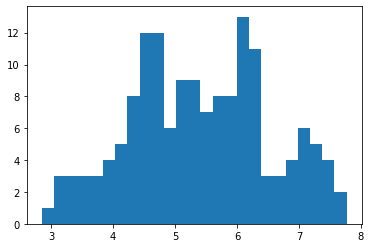

In [23]:
# plotting a histogram of the happiness data
# to get an overview of happiness distribution across all countries

plt.hist(happy_2019['Score'],bins = 25)

# based on this distribution, the happiness scores across countries 
# may follow a bimodal distribution


Text(0, 0.5, 'quantity')

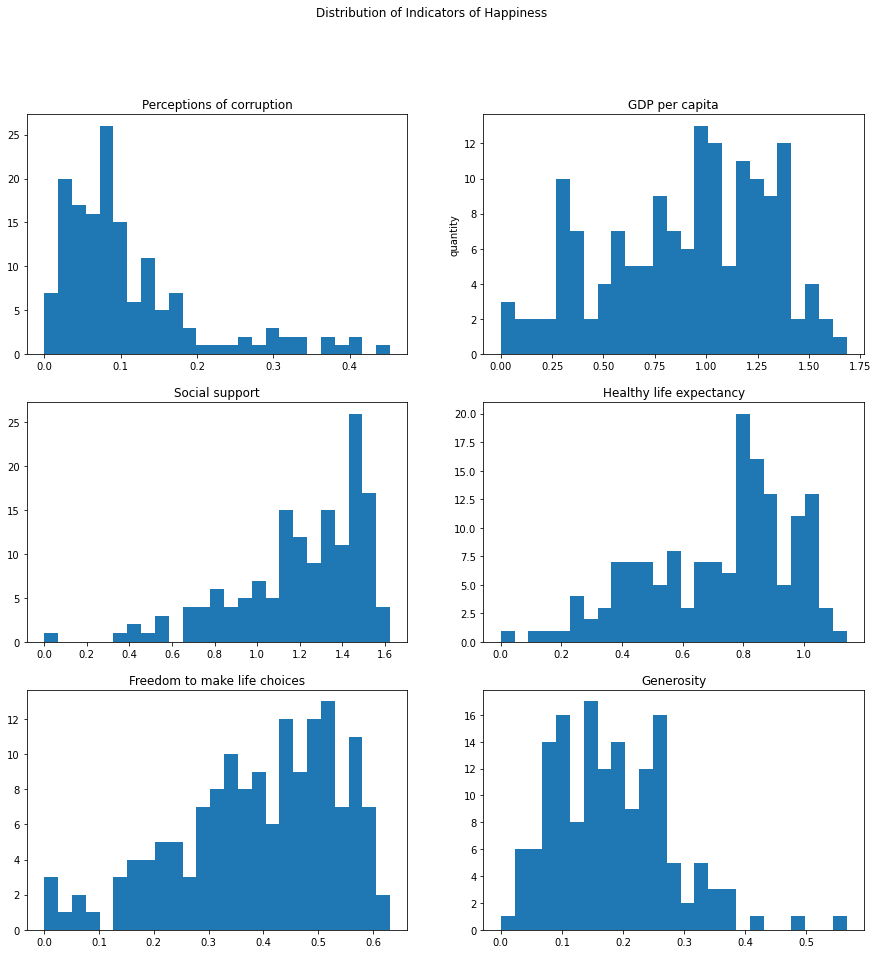

In [24]:
# making histograms for each of the six happiness subscores
# to get a distribution of each of the factors across all countries
fig, axs = plt.subplots(3, 2, figsize=(15,15))

fig.suptitle('Distribution of Indicators of Happiness')

axs[0,0].hist(happy_2019['Perceptions of corruption'], bins=25)
axs[0,1].hist(happy_2019['GDP per capita'],bins=25)
axs[1,0].hist(happy_2019['Social support'],bins=25)
axs[1,1].hist(happy_2019['Healthy life expectancy'],bins=25)
axs[2,0].hist(happy_2019['Freedom to make life choices'],bins=25)
axs[2,1].hist(happy_2019['Generosity'],bins=25)
axs[0, 0].set_title('Perceptions of corruption')
axs[0, 1].set_title('GDP per capita')
axs[1, 0].set_title('Social support')
axs[1, 1].set_title('Healthy life expectancy')
axs[2, 0].set_title('Freedom to make life choices')
axs[2, 1].set_title('Generosity')

axs[0,1].set_ylabel('quantity')


# based on these distributions, GDP per capita seems about normally distributed
# the other factors are skewed one way or the other, which means that the majority of countries have similar values for these factors
# and that we need to pay attention to outliers for these values

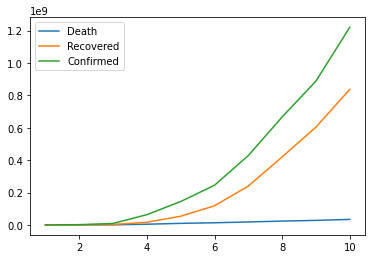

In [25]:
# making a temporary covid dataset to observe how covid cases, deaths, and recoveries increased over time
# grouping by month across all countries

temp = covid_test.copy()
temp["month"] = temp.index.get_level_values(1)
temp=temp.groupby("month").sum()
temp['Month'] = temp.index

plt.plot('Month', 'Death', data=temp)
plt.plot('Month', 'Recovered', data = temp)
plt.plot('Month', 'Confirmed', data = temp)
plt.legend()

# we don't see any unexpected dips or spikes; cases rise logarithmically with time

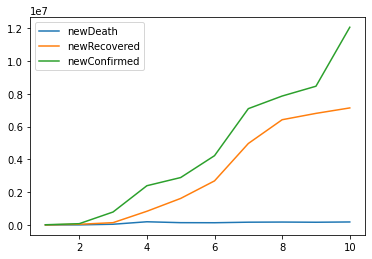

In [26]:
# making a temporary covid dataset to observe how covid cases, deaths, and recoveries increased over time
# grouping by month across all countries

plt.plot('Month', 'newDeath', data=temp)
plt.plot('Month', 'newRecovered', data = temp)
plt.plot('Month', 'newConfirmed', data = temp)
plt.legend()



In [27]:
covid_clean.head(12)

Confirmed  Death  Recovered  newConfirmed  newDeath  \
Country     Month                                                        
Afghanistan 1              0      0          0             0         0   
            2              6      0          0             1         0   
            3           1219     29         26           173         4   
            4          27237    860       2927          1997        60   
            5         225655   4994      24129         13034       193   
            6         750884  14907     184768         16312       489   
            7        1077445  33392     688117          5158       526   
            8        1163050  42026     843438          1490       130   
            9        1163851  42939     949104          1103        56   
            10       1245921  46225    1039280          2157        78   
Albania     1              0      0          0             0         0   
            2              0      0          0             0         0   

                   newRecovered  
Country     Month                
Afghanistan 1                 0  
            2                 0  
            3                 5  
            4               255  
            5              1068  
            6             12803  
            7             11378  
            8              3580  
            9              3700  
            10             1532  
Albania     1                 0  
            2                 0

In [28]:
covid_oct = covid_test.iloc[covid_test.index.get_level_values('Month') == 10]
covid_oct


,,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
Country,Month,,,,,,
Afghanistan,10,1245921,46225,1039280,2157,78,1532
Albania,10,523084,13731,305370,7226,122,3342
Algeria,10,1683631,57192,1177057,6412,228,4027
Argentina,10,29922509,795200,24249610,415923,14065,379294
Armenia,10,2012415,33744,1490885,39454,382,11316
...,...,...,...,...,...,...,...
Venezuela,10,2638216,22387,2406772,16891,170,21548
Vietnam,10,35048,1085,32150,86,0,52
Yemen,10,63654,18462,41489,29,12,80


In [29]:
happy_2019.sort_values(by = 'Country or region', ascending = True)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
46,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
115,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064
...,...,...,...,...,...,...,...,...,...
107,108,Venezuela,4.707,0.960,1.427,0.805,0.154,0.064,0.047
93,94,Vietnam,5.175,0.741,1.346,0.851,0.543,0.147,0.073
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
137,138,Zambia,4.107,0.578,1.058,0.426,0.431,0.247,0.087


In [30]:
pop_dens.sort_values(by = 'Country (or dependency)', ascending = True)

,Country (or dependency),Population (2020),Density (P/Km²),Land Area (Km²)
36,Afghanistan,38742911,60,652860
139,Albania,2878420,105,27400
32,Algeria,43685618,18,2381740
31,Argentina,45111229,17,2736690
136,Armenia,2962137,104,28470
...,...,...,...,...
49,Venezuela,28451828,32,882050
14,Vietnam,97160127,314,310070
47,Yemen,29687214,56,527970
64,Zambia,18273379,25,743390


In [33]:
covid_oct


,,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
Country,Month,,,,,,
Afghanistan,10,1245921,46225,1039280,2157,78,1532
Albania,10,523084,13731,305370,7226,122,3342
Algeria,10,1683631,57192,1177057,6412,228,4027
Argentina,10,29922509,795200,24249610,415923,14065,379294
Armenia,10,2012415,33744,1490885,39454,382,11316
...,...,...,...,...,...,...,...
Venezuela,10,2638216,22387,2406772,16891,170,21548
Vietnam,10,35048,1085,32150,86,0,52
Yemen,10,63654,18462,41489,29,12,80


# Project Proposal (updated)

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/4  | 6 PM  | Import & Wrangle Data; EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/11  | 6 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 2/18  | 6 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 2/25  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |